In [ ]:
from pangloss import BackgroundCatalog, ForegroundCatalog, \
    TrueHaloMassDistribution, Kappamap, Shearmap

import pandas as pd

ITERATIONS = 1000

# initialize background and foreground
B = BackgroundCatalog(N=10.0, domain=[1.41, 1.4, -1.41, -1.4], field=[0, 0, 0, 0])
F = ForegroundCatalog.guo(stellar_mass_threshold=58839200000.0)
F.set_mass_prior(TrueHaloMassDistribution())

# initialize maps from Hilbert et al 2009
K = Kappamap.example()
S = Shearmap.example()

output = pd.DataFrame()

# run monte carlo samples
for _ in xrange(ITERATIONS):
    print _
    F.draw_halo_masses()
    B.drill_lightcones(radius=2.0, foreground=F, smooth_corr=False)
    B.lens_by_map(K, S)
    B.lens_by_halos(lookup_table=False, smooth_corr=False, relevance_lim=0)
    halos = B.get_sampled_halo_masses_in_lightcones()
    halos['log-likelihood'] = B.halo_mass_log_likelihood()
    output = output.append(halos, ignore_index=True)

output.to_csv('/Users/user/Desktop/output.csv')
B.get_true_halo_masses_in_lightcones().to_csv('/Users/user/Desktop/truth.csv')

In [1]:
import pandas as pd

result = pd.read_csv('/Users/user/Desktop/output.csv')
truth = pd.read_csv('/Users/user/Desktop/truth.csv')

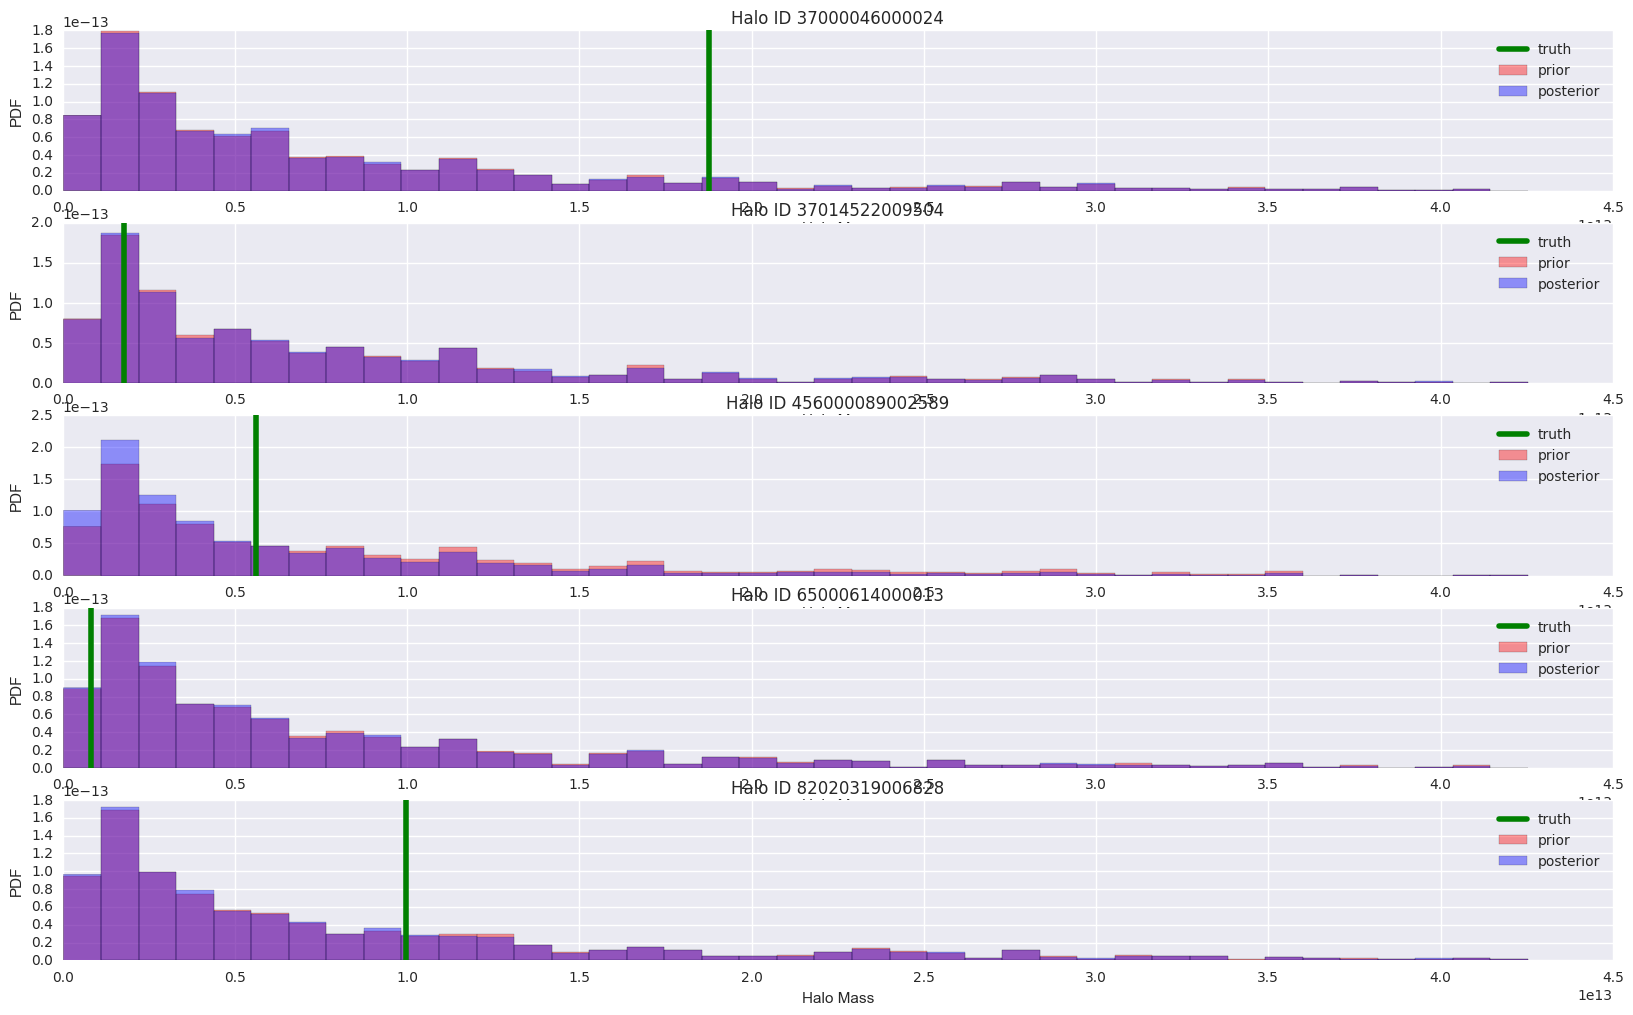

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import log

plt.rcParams['figure.figsize'] = (20, 12)

start = min([result[c].min() for c in result.columns[1:-1]])
stop = result.max().max()
base = 10
res_linspace = np.linspace(start, stop/5.0, num=40)
halos = len(result.columns)-2

for i,val in enumerate(truth.columns[1:]):
    plt.subplot(int(str(halos) + '1' + str(i+1)))
    x = result[val][result[val] > 0]
    weights = np.exp(result['log-likelihood'][result[val] > 0])
    t = truth[val].loc[0]
    plt.hist(x, bins=res_linspace, alpha=0.4, normed=True, label='prior', color='red')
    plt.hist(x, bins=res_linspace, weights=weights, alpha=0.4, normed=True, label='posterior', color='blue')
    plt.axvline(x=t, label='truth', linewidth=4, color='green')
#     plt.xscale('log')
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('Halo Mass')
    plt.title('Halo ID ' + val)
    
plt.show()

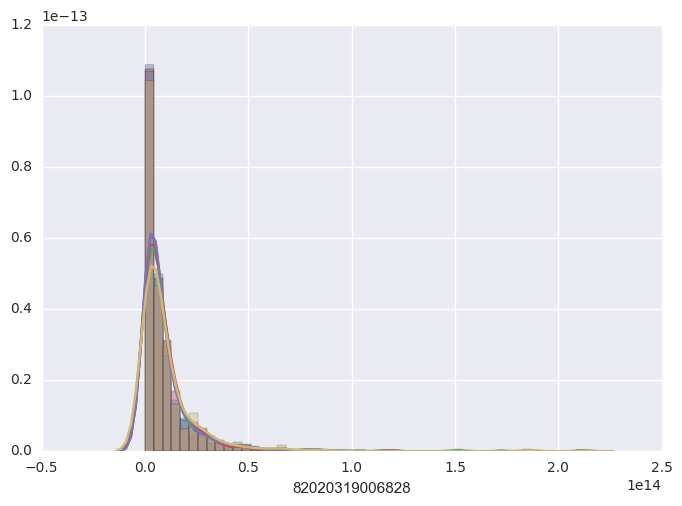

In [35]:
import seaborn as sns
for i in result.columns[1:-1]:
    sns.distplot(result[i])